In [20]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq


In [21]:
path = '1661-0.txt'
# path = 'your_file_path_here'  # replace with your actual file path

try:
    with open(path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
except UnicodeDecodeError as e:
    print(f"An error occurred: {e}")


In [22]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [23]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [24]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [25]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [26]:
print(X[0][0])

[False False False ... False False False]


In [29]:
# Building a recurrent NN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Input

model = Sequential()
# Use Input layer to define the input shape
model.add(Input(shape=(WORD_LENGTH, len(unique_words))))
model.add(LSTM(128))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))


In [31]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2
811/811 ━━━━━━━━━━━━━━━━━━━━ 181s 214ms/step - accuracy: 0.0565 - loss: 6.6317 - val_accuracy: 0.0780 - val_loss: 6.9353
Epoch 2/2
811/811 ━━━━━━━━━━━━━━━━━━━━ 153s 189ms/step - accuracy: 0.1108 - loss: 5.8131 - val_accuracy: 0.0967 - val_loss: 6.7893


In [33]:
model.save('next_word_model_v1o1.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model_v1o1.h5')
history = pickle.load(open("history.p", "rb"))

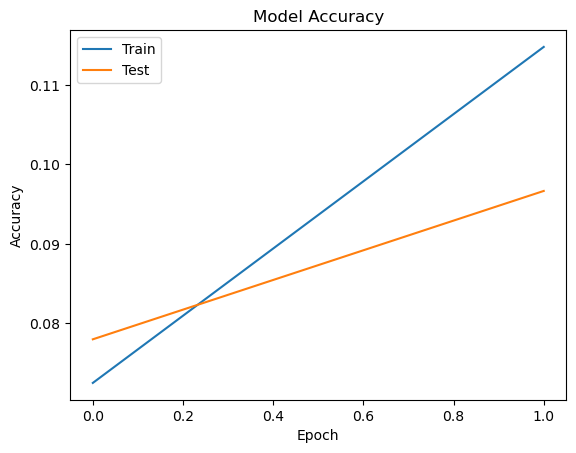

In [35]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
